# Mchezo pesa

## 1. Defining the Question

### a) Specifying the Question

Can we predict the outcomes of the Fifa Worldcup over the years ? In addition to this does the rank in anyway contributing to this 



### b) Defining the Metric for Success

The metric for success is finding a confusion matrix with zero wrong predictions or having the Y-Predictions being in the range of 2(+/- 2). 

### c) Understanding the context 

The worldcup are games played every 4 years, This is when countries asseble their teams to go compete for the FiFa world cup. The world cup is such a big event Nations ranked 6-35 in the FIFA World Ranking are drawn into six groups of five. Each team will play every other team in their group only once. The six group winners will progress.

### d) Recording the Experimental Design

For this experiment we will conduct the Exploratory Data Analysis method where we will : 


1.   Read the data - We will us the pandas library to read the csv files that we will be using 
2.   Check the dataset - We will be checking for the datatypes and the shape of the data  
1.   Externally Validate the dataset - We will validate our dataset with wikipedia  
2.   Tidy the dataset - We intend to detect outliers and anomalies, in addition to that we drop missing values and any other issues with the data. 
1.   Perform Exploratory analysis - We will perform univariate analysis and record our soloutions  
2.   Implement the soloution - We put our regression here that will help us build a model.  
1.   Challenge the soloution - We will change the hyperparameter tuning of the model to get different answers 












### e) Data Relevance

There are two datasets for this experiment. 
The first dataset has 27789 records and 16 columns which are namely: 
>rank, country full, country abreviation, 
total points,
previous points, rank_change, current year average, current year average weighted,last year average,last year average weighted,
two year ago average,two year ago weighted,three year ago average,three year ago weighted,confederation, rank date. 

The second dataset has 28444 records and 9 columns and the columns are namely: 


> date, home_team, away team, home score, away score,
tournament, city, country, neutral



## 2. Reading the Data

In [3]:
# Importing the neccessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [4]:
# Loading the Dataset 
#
df = pd.read_csv('fifa_ranking.csv')

In [5]:
# Loading the second Dataset 
# 
df1 = pd.read_csv('results.csv')

## 3. Checking the Data

#### The first dataset 

In [6]:
# Determining the no. of records in our dataset
#
df.shape

(57793, 16)

In [7]:
# Previewing the top of our dataset
#
df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [8]:
# Previewing the bottom of our dataset
# 
df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [9]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [10]:
df['rank_date'] = pd.to_datetime(df['rank_date'])

#### The second dataset

In [11]:
# Determining the number of records in our dataset
# 
df1.shape

(40839, 9)

In [12]:
# Previewing the top of our dataset 
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [13]:
# Previewing the bottom of our dataset
#
df1.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [14]:
# Checking whether each column has an appropriate datatype
#
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [15]:
df1['date'] = pd.to_datetime(df1['date'])

## 5. External Validation of the data 

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 6. Tidying the Dataset

#### The first dataset

In [16]:
df.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


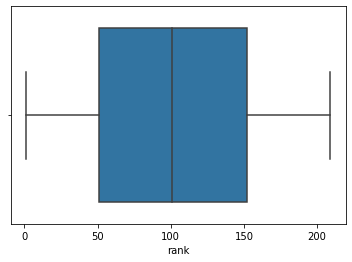

In [17]:
# Checking for Outliers
#
sns.boxplot(df['rank'])

In [18]:
# Checking for Anomalies
#
# Finding the interquartile range
q1 = df['rank'].quantile(.25)
q3= df['rank'].quantile(.75)
iqr = q3 - q1
#finding the end of the whiskers in the box and whisker
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
#Checking if there are any values above the whiskers in the data
def over(x):
  for x in df['rank']: 
     if x > u_bound:
       return 'Anomaly'
     elif x < u_bound:
       continue 
     else:
       break 
over(df)

It seems there are no anomalies in this dataset

In [19]:
# Identifying the Missing Data
#
df.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [20]:
# Dealing with the Missing Data
#
df = df.dropna()

In [21]:
# More data cleaning procedures
#
df.rename(columns={'country_full':'country'}, inplace=True)

In [22]:
df.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


#### The second dataset 

In [23]:
df1.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


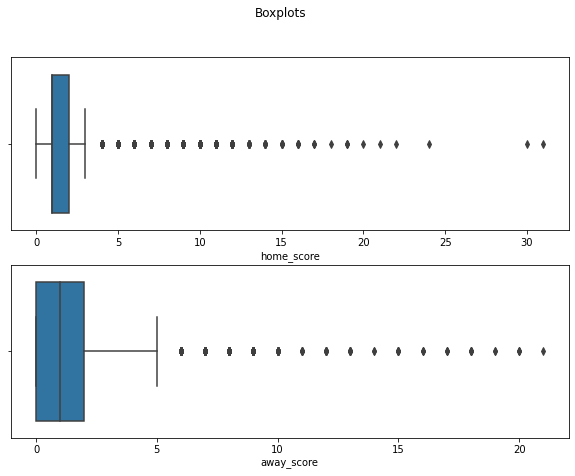

In [24]:
# Checking for outliers 
#
fig,((ax1, ax2))= plt.subplots(2,1, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df1['home_score'], ax=ax1)
sns.boxplot(df1['away_score'], ax=ax2)
plt.show()

In [25]:
# Checking for anomalies
# 
q1 = df1['home_score'].quantile(.25)
q3= df1['home_score'].quantile(.75)
iqr = q3 - q1
#finding the end of the whiskers in the box and whisker
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
#Checking if there are any values above the whiskers in the data
def over(x):
  for x in df1['home_score']: 
     if x > u_bound:
       return 'Anomaly'
     elif x < u_bound:
       continue 
     else:
       break 
over(df)

'Anomaly'

In [26]:
# Checking for anomalies
# 
q1 = df1['away_score'].quantile(.25)
q3= df1['away_score'].quantile(.75)
iqr = q3 - q1
#finding the end of the whiskers in the box and whisker
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
#Checking if there are any values above the whiskers in the data
def over(x):
  for x in df1['away_score']: 
     if x > u_bound:
       return 'Anomaly'
     elif x < u_bound:
       continue 
     else:
       break 
over(df)

'Anomaly'

In [27]:
# Identifying missing data 
#  
df1.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [28]:
# Dealing with missing data 
#
df1 = df1.dropna()

In [29]:
# More data cleaning procedures
#  
df1['difference'] = df1['home_score'] - df1['away_score']

In [30]:
df1['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [31]:
non_strat_output = df1.sample(frac=0.1) 

# check the proportion of the non_stratified sample
print(non_strat_output['tournament'].value_counts())

Friendly                                1695
FIFA World Cup qualification             695
UEFA Euro qualification                  235
African Cup of Nations qualification     143
FIFA World Cup                            98
                                        ... 
GaNEFo                                     1
Tournoi de France                          1
Copa Premio Honor Uruguayo                 1
World Unity Cup                            1
Copa Oswaldo Cruz                          1
Name: tournament, Length: 95, dtype: int64


In [32]:
strat_output = df1.groupby('tournament', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(strat_output['tournament'].value_counts())

# Check the stratified output
print(strat_output)

Friendly                                1691
FIFA World Cup qualification             710
UEFA Euro qualification                  243
African Cup of Nations qualification     162
FIFA World Cup                            90
                                        ... 
UAFA Cup qualification                     1
GaNEFo                                     1
Atlantic Cup                               1
Tournoi de France                          1
Nile Basin Tournament                      1
Name: tournament, Length: 103, dtype: int64
            date    home_team  ... neutral  difference
33737 2011-12-02     Suriname  ...   False           0
34236 2012-07-13     Suriname  ...    True           8
36669 2015-01-23         Iran  ...    True           0
26773 2004-07-30   Uzbekistan  ...    True           0
29369 2007-07-09        Japan  ...    True           0
...          ...          ...  ...     ...         ...
8407  1972-11-29  Saint Lucia  ...   False           1
7998  1971-12-04     

In [33]:
sample = strat_output[strat_output['tournament']=='FIFA World Cup']
sample

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,difference
32175,2010-07-02,Uruguay,Ghana,1,1,FIFA World Cup,Johannesburg,South Africa,True,0
6194,1966-07-12,North Korea,Russia,0,3,FIFA World Cup,Middlesbrough,England,True,-3
5111,1962-05-30,Chile,Switzerland,3,1,FIFA World Cup,Santiago,Chile,False,2
21337,1998-06-25,Belgium,South Korea,1,1,FIFA World Cup,Paris,France,True,0
24782,2002-06-04,Japan,Belgium,2,2,FIFA World Cup,Saitama,Japan,False,0
...,...,...,...,...,...,...,...,...,...,...
32132,2010-06-18,Slovenia,United States,2,2,FIFA World Cup,Johannesburg,South Africa,True,0
6192,1966-07-12,Brazil,Bulgaria,2,0,FIFA World Cup,Liverpool,England,True,2
10510,1978-06-10,France,Hungary,3,1,FIFA World Cup,Mar del Plata,Argentina,True,2
14224,1986-06-16,Brazil,Poland,4,0,FIFA World Cup,Guadalajara,Mexico,True,4


In [34]:
sample['rank'] = df['rank']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 6. Exploratory Analysis

#### The first dataset 

In [35]:
# Ploting the univariate summaries and recording our observations
#
df['confederation'].value_counts()

UEFA        14933
CAF         14876
AFC         12617
CONCACAF     9664
CONMEBOL     2860
OFC          2843
Name: confederation, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


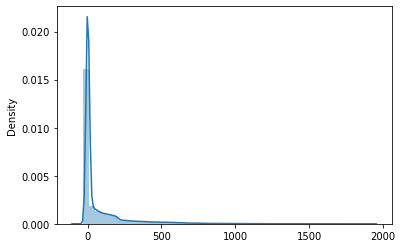

In [36]:
X = df.drop(['country','country_abrv','confederation','rank_date'],axis =1)
sns.distplot(X)

#### The second dataset

In [37]:
df1.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1


In [38]:
# Plotting the univariate summaries and recording our observation 
# 
M = df1['neutral'].value_counts()


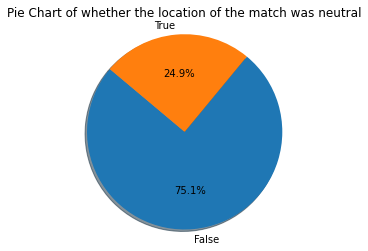

In [39]:
x = ['False','True']
plt.pie(M, labels = x, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of whether the location of the match was neutral')
plt.show()

## 7. Implementing the Solution

#### The first problem 

In [40]:
# Implementing the Solution
# 
sample.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,difference,rank
32175,2010-07-02,Uruguay,Ghana,1,1,FIFA World Cup,Johannesburg,South Africa,True,0,76
6194,1966-07-12,North Korea,Russia,0,3,FIFA World Cup,Middlesbrough,England,True,-3,181
5111,1962-05-30,Chile,Switzerland,3,1,FIFA World Cup,Santiago,Chile,False,2,26


In [41]:
sample.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
difference    0
rank          0
dtype: int64

In [42]:
sample = sample.dropna()

In [43]:
def test(x):
  for x in sample['difference']:
        if x == 0:
            return 'Draw'
        elif x > 0:
            return 'Win'
        else:
            return 'Loss'
test(sample)
sample['result'] = test(sample)

In [44]:
sample['result']

32175    Draw
6194     Draw
5111     Draw
21337    Draw
24782    Draw
         ... 
32132    Draw
6192     Draw
10510    Draw
14224    Draw
21304    Draw
Name: result, Length: 90, dtype: object

In [45]:
Losers = sample[sample['difference']<0]

In [46]:
Losers['result']= 'Loss'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
Drawers = sample[sample['difference']==0]

In [48]:
Drawers['result']= 'Draw'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
Winners = sample[sample['difference']>0]

In [50]:
Winners['result']= 'Win'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
frames = [Losers, Drawers, Winners]
sample = pd.concat(frames)

In [52]:
sample.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,difference,rank,result
6194,1966-07-12,North Korea,Russia,0,3,FIFA World Cup,Middlesbrough,England,True,-3,181,Loss
3647,1954-06-20,Germany,Hungary,3,8,FIFA World Cup,Basel,Switzerland,True,-5,7,Loss
7463,1970-06-14,Mexico,Italy,1,4,FIFA World Cup,Toluca,Mexico,False,-3,112,Loss


In [53]:
sample.replace('Loss',-1,inplace=True)
sample.replace('Draw',0,inplace=True)
sample.replace('Win',1,inplace=True)

In [54]:
X = sample.drop(['result','tournament','city','country','neutral','date','home_team','away_team'],axis=1)
Y = sample['result']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [56]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
Y_pred = LogReg.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[9, 0, 0],
       [0, 3, 0],
       [0, 0, 6]])

In [59]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

,Actual,Predicted
7463,-1,-1
14222,-1,-1
2100,1,1
21361,0,0
14211,1,1
4368,-1,-1
36105,0,0
28370,0,0
16123,1,1
14224,1,1


In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


#### The second problem 

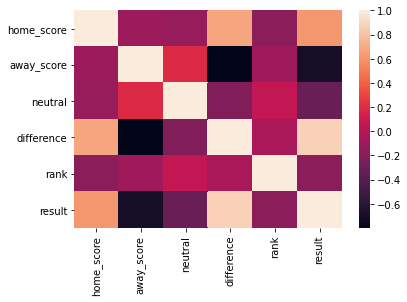

In [82]:
sns.heatmap(sample.corr())

In [83]:
# Implemementing the Solution 
# 
M = sample['home_score']
N = sample['difference']

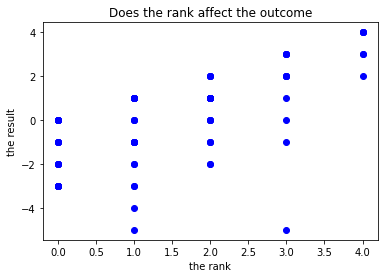

In [84]:
plt.scatter(M, N, color='blue') 
plt.title('Does the rank affect the outcome')
plt.xlabel('the rank')
plt.ylabel('the result')
plt.show()

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
M_train, N_train, M_test, N_test = train_test_split(M,N, test_size = 0.2, random_state=0)

In [86]:
print(M.shape,N.shape)

(90,) (90,)


In [87]:
M = np.expand_dims(M,axis=1)
N = np.expand_dims(N,axis=1)

In [88]:
print(M.shape,N.shape)

(90, 1) (90, 1)


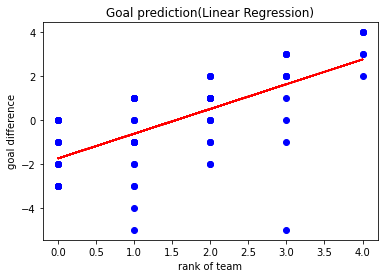

In [89]:
reg_line = LinearRegression()
reg_line.fit(M,N)


plt.scatter(M, N, color='blue') 
plt.plot(M, reg_line.predict(M), color='red')
plt.title('Goal prediction(Linear Regression)')
plt.xlabel('rank of team')
plt.ylabel('goal difference')
plt.show()

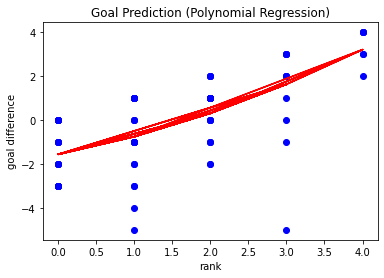

In [90]:
poly_reg = PolynomialFeatures(degree = 2) 
M_poly = poly_reg.fit_transform(M)


pol_reg = LinearRegression()
pol_reg.fit(M_poly, N)


plt.scatter(M, N, color='blue') 
plt.plot(M, pol_reg.predict(M_poly), color='red')
plt.title('Goal Prediction (Polynomial Regression)')
plt.xlabel('rank')
plt.ylabel('goal difference')
plt.show()

## 8. Challenging the solution

#### The first problem 

For the first problem I cant challenge the soloution this is because I got the perfect predictions using my model. Therefore there is no way I can perfect it more than that. 






#### The second problem 

For the second problem I can maybe try changing the degree of the polynomial to see if I'll get a better fit for my model 

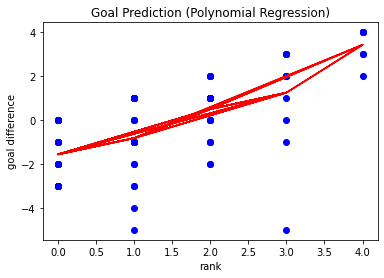

In [91]:
poly_reg = PolynomialFeatures(degree = 4) 
M_poly = poly_reg.fit_transform(M)


pol_reg = LinearRegression()
pol_reg.fit(M_poly, N)


plt.scatter(M, N, color='blue') 
plt.plot(M, pol_reg.predict(M_poly), color='red')
plt.title('Goal Prediction (Polynomial Regression)')
plt.xlabel('rank')
plt.ylabel('goal difference')
plt.show()

## 9. Follow up questions

### a). Did we have the right data?

We had adequate data for modelling in this situation

### b). Do we need other data to answer our question?

No we do not need other data to answer our question 

### c). Did we have the right question?

Yes we had the right question , because our model worked perfectly fine. 